#Intergenerational Advice and Matching: An Experimental Study

## PI: Andrew Schotter and Tingting Ding
---

## The purpose of this program is to analyze indicators by mechanism across strategies.
### Program Author: Anwar A. Ruff

In [2]:
# Prologue
import pandas as pd
import numpy as np
from pandas import DataFrame, Series

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (14,6)})

In [4]:
# Read in the merged Data File
merged = pd.io.pickle.read_pickle('merged_data.p')

In [5]:
# Drop the second strategy
merged.head()
merged.drop('sp2', 1, inplace=True)

##Questions

###1. Should we ignore mechanism 0?

In [6]:
merged[merged['mech'] == 0]

,sid,chatid,C,I,I-,L,P,P-,S,T,T-,gid,hom-het-iso,mech,obv,type,sp1,net
18,2,1,0,0,0,0,1,0,0,1,0,1,0,0,26,1,2,1
19,2,2,0,1,0,0,0,0,0,1,0,1,0,0,40,2,1,1
20,2,3,0,0,0,0,1,0,0,0,0,1,0,0,35,3,2,1
21,2,4,0,0,0,0,1,0,0,0,0,1,0,0,34,4,2,1
22,2,5,0,1,0,0,0,0,0,0,0,1,0,0,38,5,3,1
23,3,1,0,0,0,0,1,0,0,0,0,1,0,0,41,1,2,2
24,3,2,0,0,0,0,1,0,1,1,1,1,0,0,51,1,1,2
25,3,3,0,0,1,0,1,0,0,1,1,1,0,0,49,1,1,2
26,3,4,0,0,0,1,1,0,1,0,0,1,0,0,46,2,2,2
27,3,5,0,0,0,0,1,0,0,1,0,1,0,0,43,2,1,2


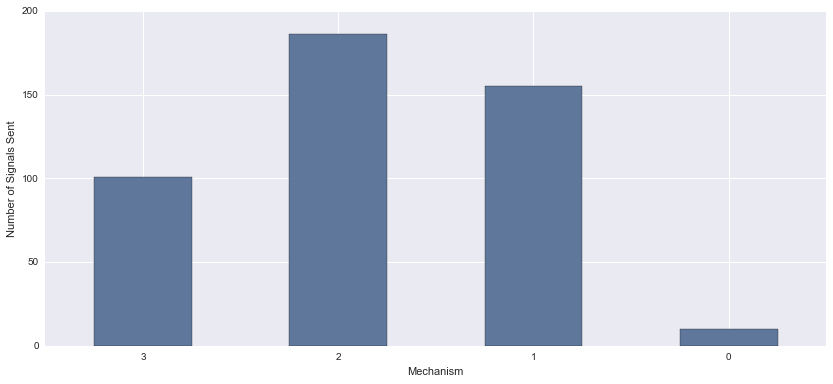

In [7]:
mech_counts = merged['mech'].value_counts()
mech_counts = mech_counts.sort_index(ascending=False)
ax = mech_counts.plot(kind='bar', rot=0)
ax.set_ylabel("Number of Signals Sent")
ax.set_xlabel("Mechanism")

## Observations 

### None of the subjects chose 4, 5, or 6 as their preference

In [8]:
merged[merged['sp1'] == 4]

,sid,chatid,C,I,I-,L,P,P-,S,T,T-,gid,hom-het-iso,mech,obv,type,sp1,net


In [9]:
merged[merged['sp1'] == 5]

,sid,chatid,C,I,I-,L,P,P-,S,T,T-,gid,hom-het-iso,mech,obv,type,sp1,net


In [10]:
merged[merged['sp1'] == 6]

,sid,chatid,C,I,I-,L,P,P-,S,T,T-,gid,hom-het-iso,mech,obv,type,sp1,net


In [11]:
m = merged.groupby(['mech', 'sp1']).sum()
m

sid  chatid  C   I  I-   L   P  P-   S   T  T-  gid  hom-het-iso  \
mech sp1                                                                      
0    1      11      12  0   1   1   0   3   0   1   4   2    4            0   
     2      12      13  0   0   0   1   5   0   1   1   0    5            0   
     3       2       5  0   1   0   0   0   0   0   0   0    1            0   
1    1     393     550  4   1   2  12  11   7   4  48   1  292          121   
     2     537     952  6   8   4  19  58   3   9  12  19  503          184   
     3      46      87  0   3   0   1   2   0   0   1   1   48           15   
2    1    1246     754  2   2   7  17  12   8   4  56   4  361          161   
     2    1596     935  2  10   8  17  68   1  12  20  19  466          200   
     3     208     107  1   8   0   3   6   2   1   0   3   61           29   
3    1    1250     470  2   5   1  13  13   7   6  36   5  216          110   
     2     972     399  1  11   4  11  24   1   6  11   8  203           85   
     3     217     113  0   9   0   0   1   0   2   0   1   56           20   

            obv  type  net  
mech sp1                    
0    1      183     6    7  
     2      182    11    7  
     3       38     5    1  
1    1     7277   183  114  
     2     9892   251  164  
     3      871    30   14  
2    1    23316   220  138  
     2    29940   290  185  
     3     3916    47   28  
3    1    23685   146   95  
     2    18412   115   75  
     3     4100    39   16

# Mechanism 1
##Preference Truthful, Strategic, Irrational

In [12]:
mechanism_one = m.loc[(1, 1):(1,3)].drop(['gid', 'hom-het-iso', 'obv','type', 'net', 'sid', 'chatid'], 1)
mechanism_one.index.names = ['Mechanism', 'Preference']
mechanism_one = mechanism_one.loc[1]
mechanism_one.index
#m1.columns = m1.columns.get_level_values(0)
#m1.columns = ['Truthful', 'Strategic', 'Irrational']
#m1 = m1.T


Int64Index([1, 2, 3], dtype='int64')

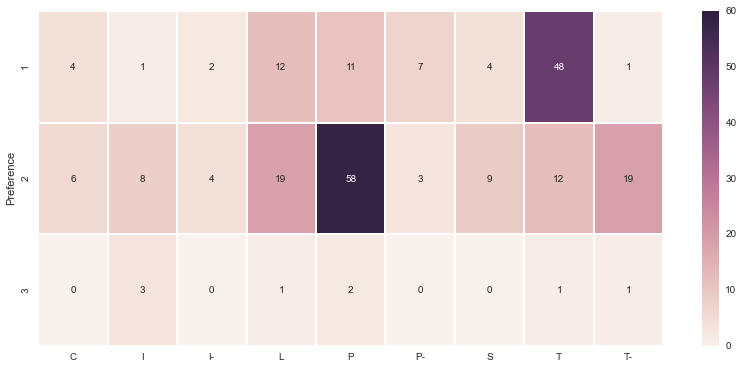

In [13]:
sns.heatmap(mechanism_one, annot=True, fmt="d", vmax=60)

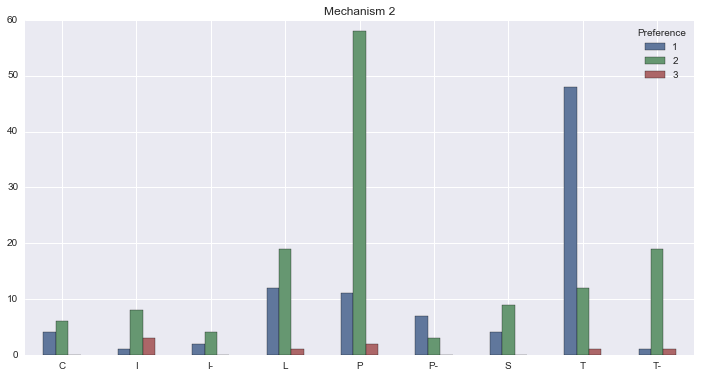

In [15]:
ax1 = mechanism_one.T.plot(kind="bar", title="Mechanism 2", figsize=(12,6), rot=0)

# Mechanism 2
##Preference Truthful, Strategic, Irrational

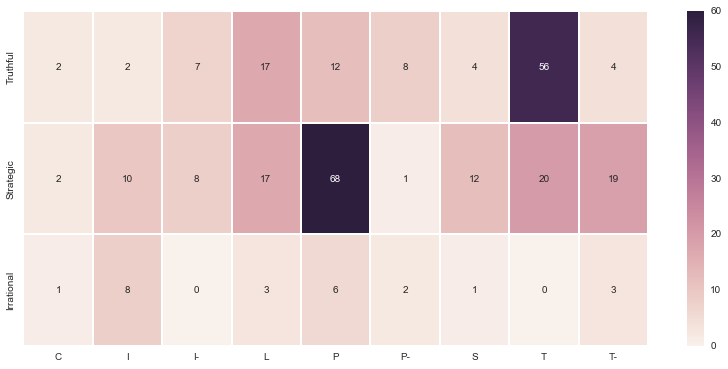

In [18]:
m2 = m.loc[(2, 1):(2,3)].drop(['gid', 'hom-het-iso', 'obv','type', 'net', 'sid', 'chatid'], 1)
m2 = m2.T
m2.columns = m2.columns.get_level_values(0)
m2.columns = ['Truthful', 'Strategic', 'Irrational']
m2 = m2.T
sns.heatmap(m2, annot=True, fmt="d", vmax=60)

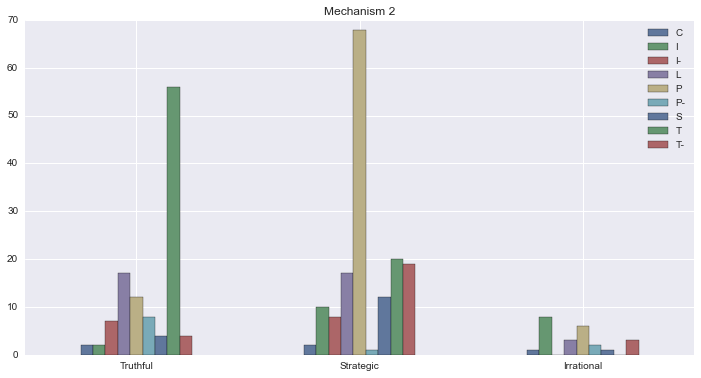

In [19]:
m2.plot(kind="bar", title="Mechanism 2", figsize=(12,6), rot=0)

#Mechanism 3
##Preference Truthful, Strategic, Irrational

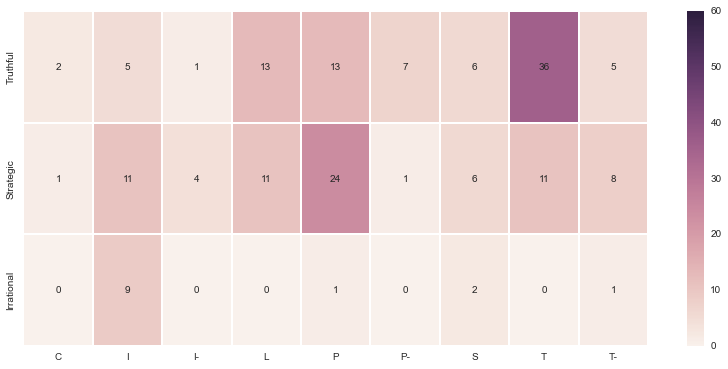

In [22]:
m3 = m.loc[(3, 1):(3,3)].drop(['gid', 'hom-het-iso', 'obv','type', 'net', 'sid', 'chatid'], 1)
m3 = m3.T
m3.columns = m3.columns.get_level_values(0)
m3.columns = ['Truthful', 'Strategic', 'Irrational']
m3 = m3.T
sns.heatmap(m3, annot=True, fmt="d", vmax=60)

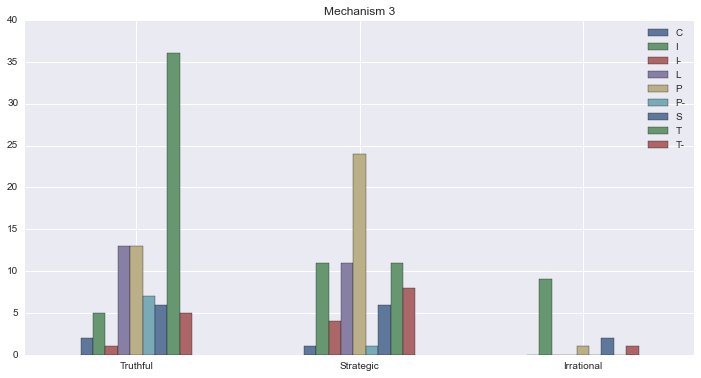

In [23]:
m3.plot(kind="bar", title="Mechanism 3", figsize=(12,6), rot=0)